In [1]:
!nvidia-smi

Sun Mar  1 02:09:08 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
from tensorflow.keras import backend as K   # Use tensorflow.keras
K.clear_session()

In [0]:

from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow import set_random_seed

from numpy.random import seed

import numpy as np

In [0]:
epochs = 100
batch_size = 256   

In [5]:
import pandas as pd 
df=pd.read_csv("https://github.com/yaniv256/VAEs-in-Economics/blob/master/Data/Timeuse/time_shares_only_2013.csv?raw=true")
df.head()

Sleeping  ...  Public_health_activities
0       540  ...                         0
1       580  ...                         0
2       450  ...                         0
3       450  ...                         0
4       570  ...                         0

[5 rows x 389 columns]

In [6]:
from sklearn.preprocessing import QuantileTransformer

qt_trans = QuantileTransformer(n_quantiles=1000, random_state=0)
qt = pd.DataFrame(qt_trans.fit_transform(df))
qt.columns = df.columns
qt.head()

Sleeping  ...  Public_health_activities
0  0.571572  ...                       0.0
1  0.693193  ...                       0.0
2  0.262262  ...                       0.0
3  0.262262  ...                       0.0
4  0.663163  ...                       0.0

[5 rows x 389 columns]

In [0]:
from sklearn.model_selection import train_test_split 
x_train, x_test = train_test_split(qt, test_size=0.33, random_state=42)
train_examples = x_train.shape[0]
flag_0 = np.zeros((train_examples,1),dtype=x_train.values.dtype)
x_train = np.concatenate((x_train.values,flag_0),axis=-1)
test_examples = x_test.shape[0]
flag_1 = np.ones((test_examples,1),dtype=x_test.values.dtype)
x_test = np.concatenate((x_test.values,flag_1),axis=-1)

In [0]:
# !rm -f vaes_net.py
# !wget "https://raw.githubusercontent.com/yaniv256/VAEs-in-Economics/master/Notebooks/vaes_net.py"
import vaes_net as vnn

In [0]:
import importlib

(?, 1)
Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 390)]        0                                            
__________________________________________________________________________________________________
tf_op_layer_strided_slice_11 (T [(None, 389)]        0           input_10[0][0]                   
__________________________________________________________________________________________________
gaussian_noise_5 (GaussianNoise (None, 389)          0           tf_op_layer_strided_slice_11[0][0
__________________________________________________________________________________________________
dense_45 (Dense)                (None, 2048)         800768      gaussian_noise_5[0][0]           
____________________________________________________________________________________

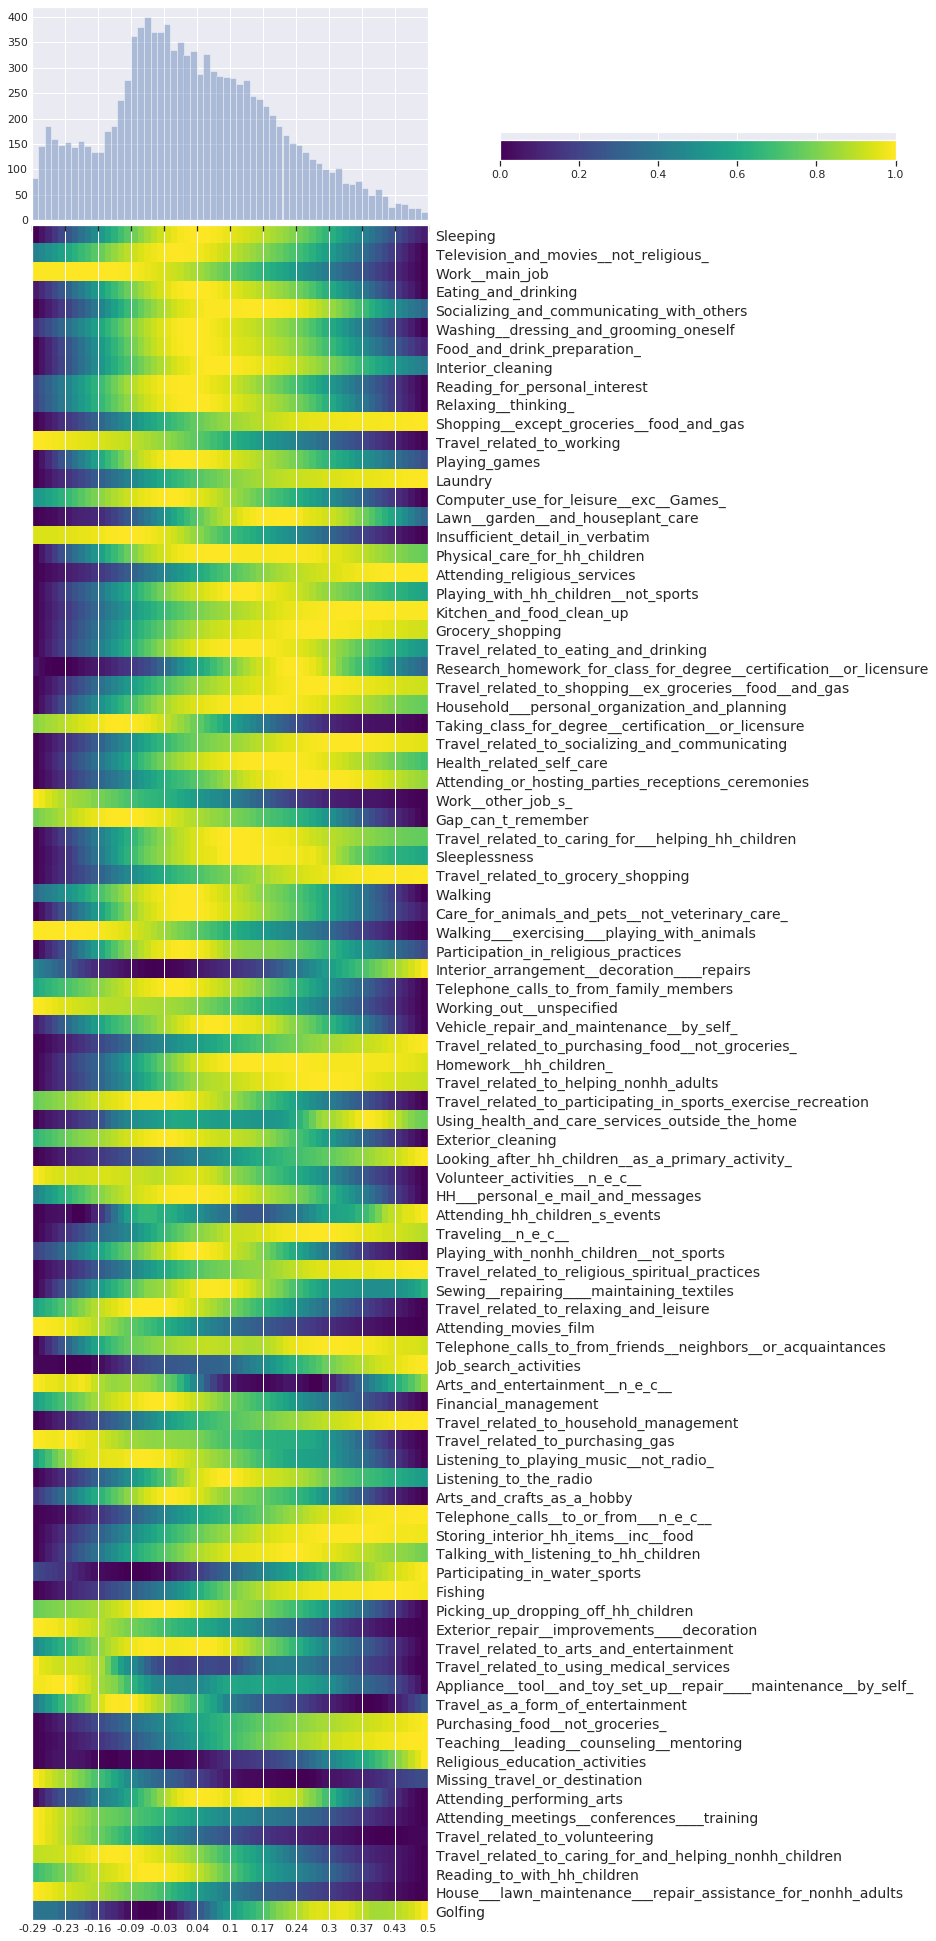

7627/7627 [==============================] - 9s 1ms/sample - loss: 0.0169 - val_loss: 0.0158
Epoch 2/8
7627/7627 [==============================] - 1s 79us/sample - loss: 0.0157 - val_loss: 0.0148
Epoch 3/8
7627/7627 [==============================] - 1s 77us/sample - loss: 0.0154 - val_loss: 0.0146
Epoch 4/8
7627/7627 [==============================] - 1s 78us/sample - loss: 0.0153 - val_loss: 0.0145
Epoch 5/8
7627/7627 [==============================] - 1s 77us/sample - loss: 0.0153 - val_loss: 0.0144
Epoch 6/8
7627/7627 [==============================] - 1s 78us/sample - loss: 0.0152 - val_loss: 0.0143
Epoch 7/8
7627/7627 [==============================] - 1s 75us/sample - loss: 0.0151 - val_loss: 0.0142
Epoch 8/8
7627/7627 [==============================] - 1s 76us/sample - loss: 0.0151 - val_loss: 0.0141
Round number:  2
Train on 7627 samples, validate on 3758 samples
Epoch 1/8
7168/7627 [===========================>..] - ETA: 0s - loss: 0.0150

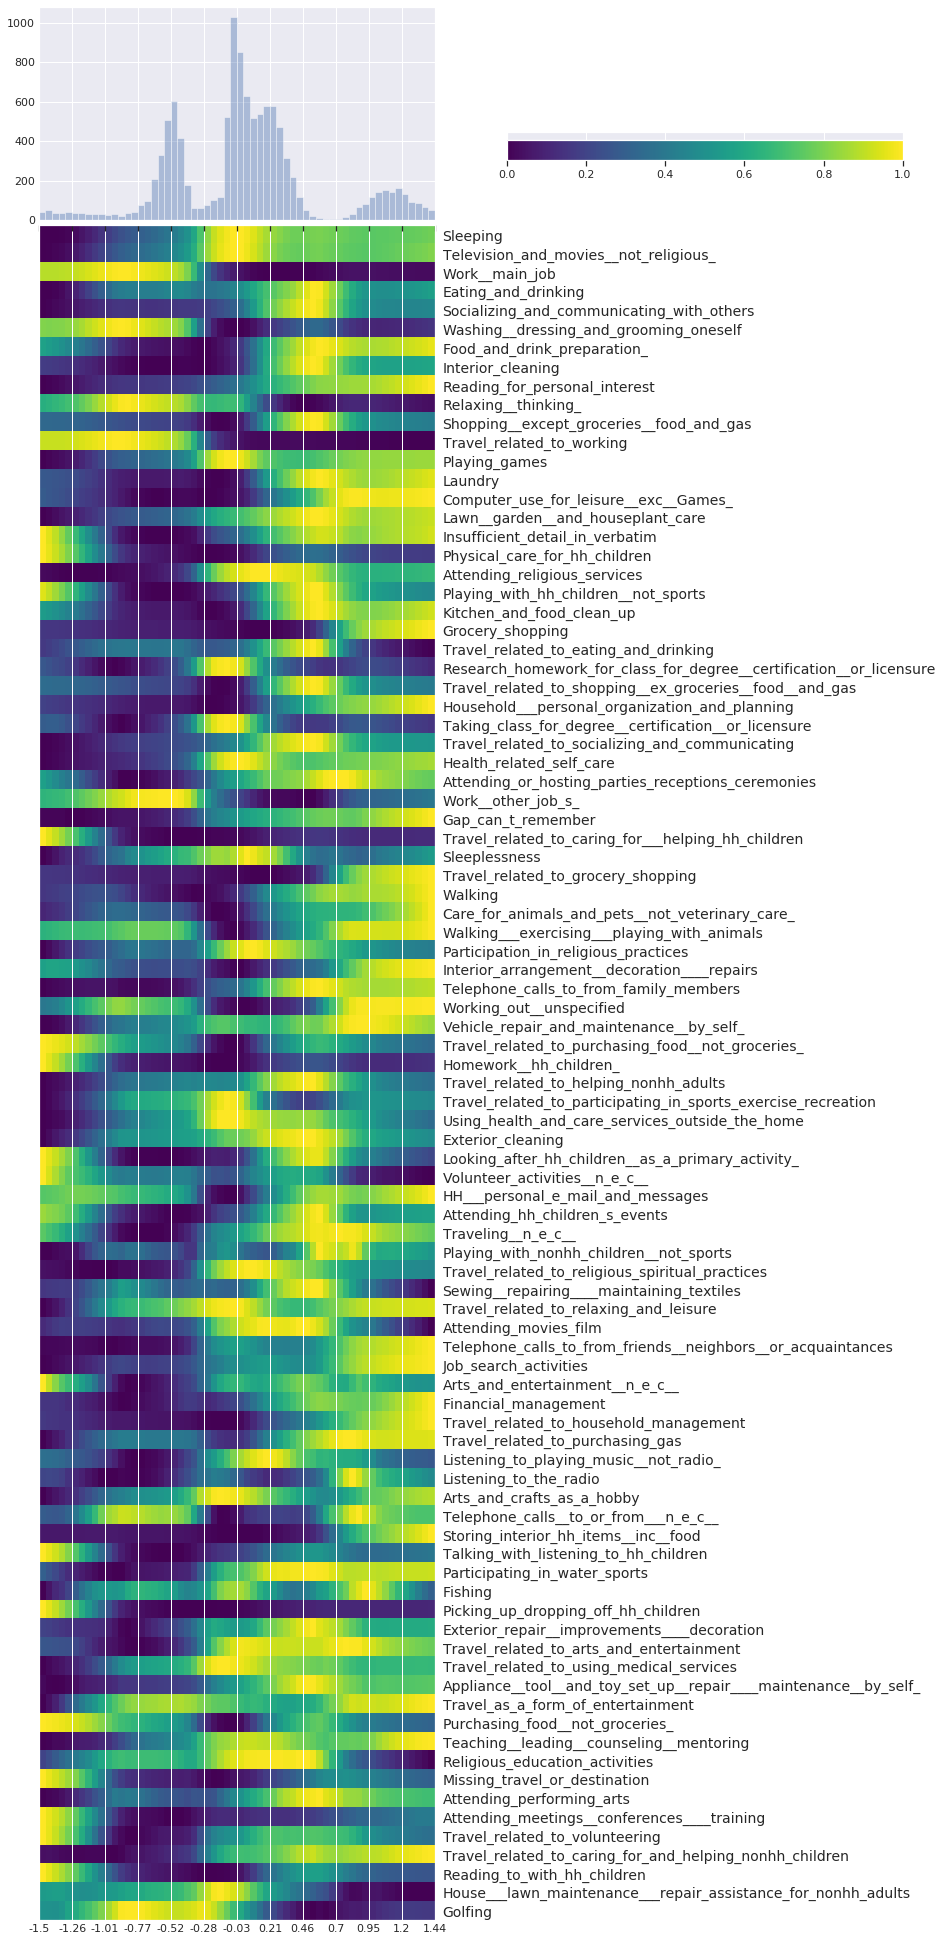

7627/7627 [==============================] - 5s 602us/sample - loss: 0.0150 - val_loss: 0.0141
Epoch 2/8
7627/7627 [==============================] - 1s 79us/sample - loss: 0.0150 - val_loss: 0.0140
Epoch 3/8
7627/7627 [==============================] - 1s 77us/sample - loss: 0.0149 - val_loss: 0.0140
Epoch 4/8
7627/7627 [==============================] - 1s 77us/sample - loss: 0.0149 - val_loss: 0.0139
Epoch 5/8
7627/7627 [==============================] - 1s 76us/sample - loss: 0.0149 - val_loss: 0.0138
Epoch 6/8
7627/7627 [==============================] - 1s 77us/sample - loss: 0.0148 - val_loss: 0.0137
Epoch 7/8
7627/7627 [==============================] - 1s 77us/sample - loss: 0.0148 - val_loss: 0.0138
Epoch 8/8
7627/7627 [==============================] - 1s 75us/sample - loss: 0.0148 - val_loss: 0.0137
Round number:  3
Train on 7627 samples, validate on 3758 samples
Epoch 1/8
7168/7627 [===========================>..] - ETA: 0s - loss: 0.0148

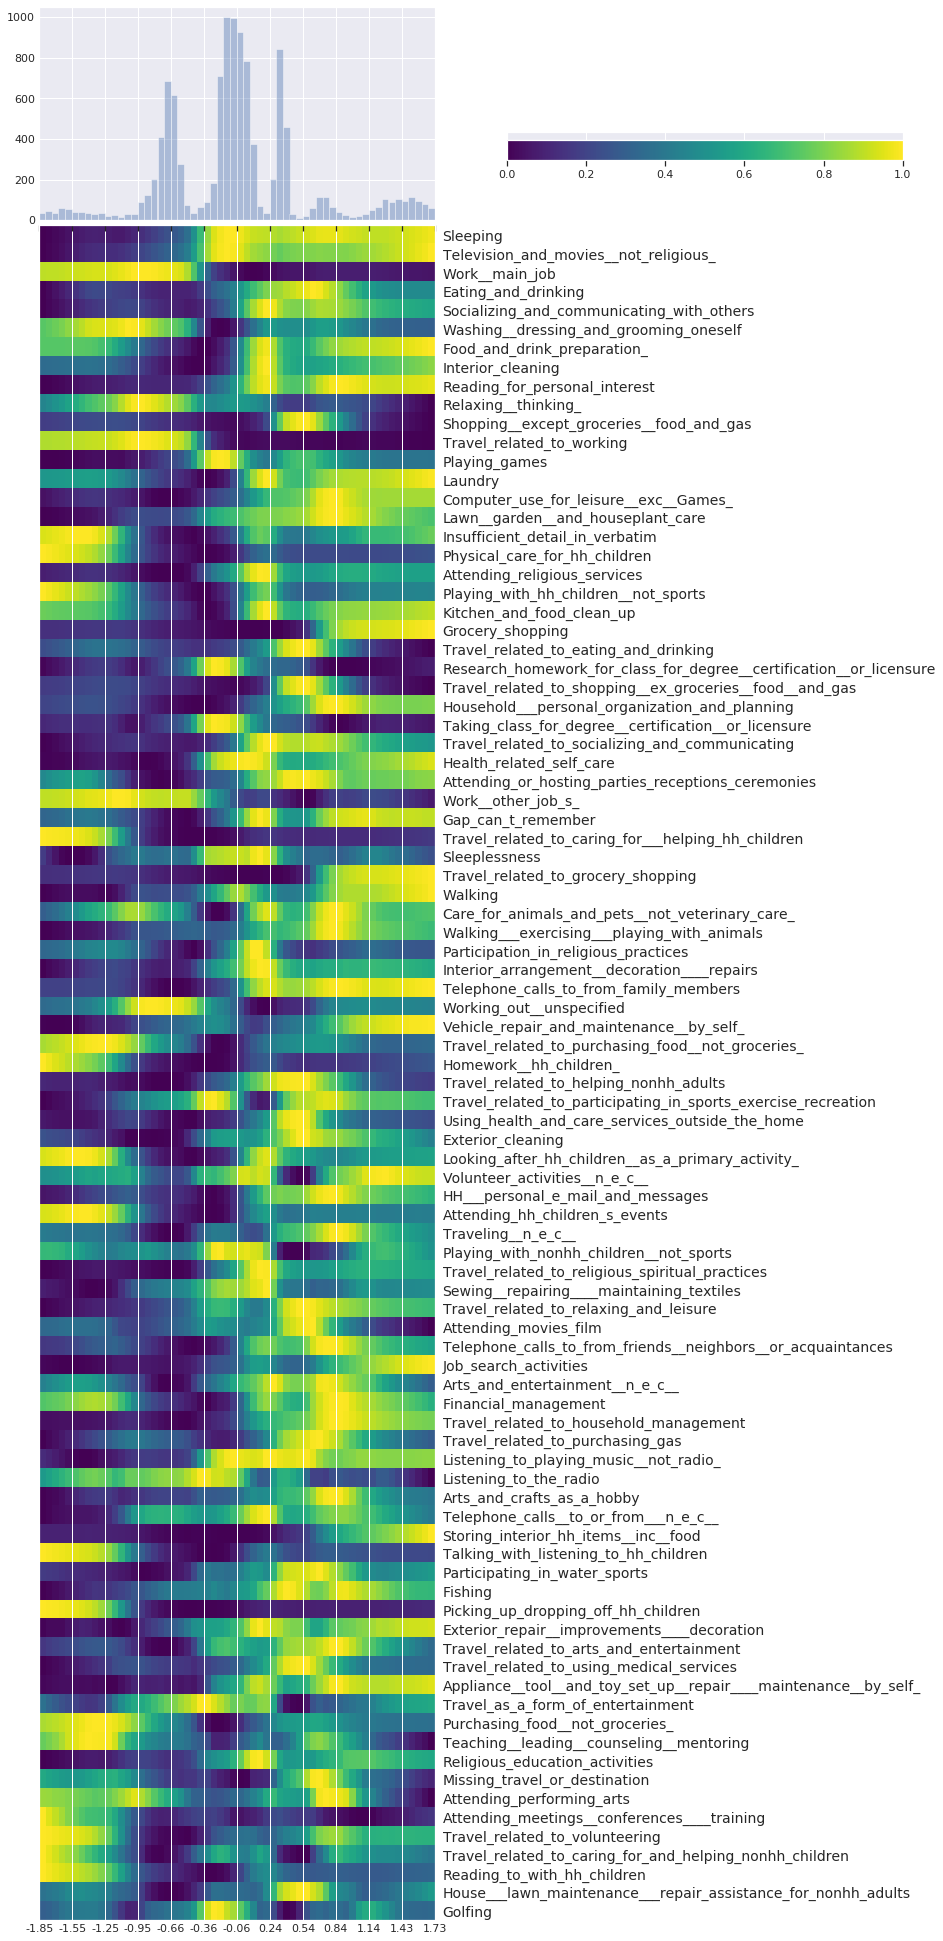

7627/7627 [==============================] - 5s 598us/sample - loss: 0.0148 - val_loss: 0.0137
Epoch 2/8
7627/7627 [==============================] - 1s 76us/sample - loss: 0.0148 - val_loss: 0.0137
Epoch 3/8
7627/7627 [==============================] - 1s 75us/sample - loss: 0.0147 - val_loss: 0.0136
Epoch 4/8
7627/7627 [==============================] - 1s 77us/sample - loss: 0.0147 - val_loss: 0.0136
Epoch 5/8
7627/7627 [==============================] - 1s 76us/sample - loss: 0.0147 - val_loss: 0.0136
Epoch 6/8
7627/7627 [==============================] - 1s 77us/sample - loss: 0.0147 - val_loss: 0.0136
Epoch 7/8
7627/7627 [==============================] - 1s 75us/sample - loss: 0.0147 - val_loss: 0.0136
Epoch 8/8
7627/7627 [==============================] - 1s 76us/sample - loss: 0.0147 - val_loss: 0.0136
Round number:  4
Train on 7627 samples, validate on 3758 samples
Epoch 1/8
7424/7627 [============================>.] - ETA: 0s - loss: 0.0147

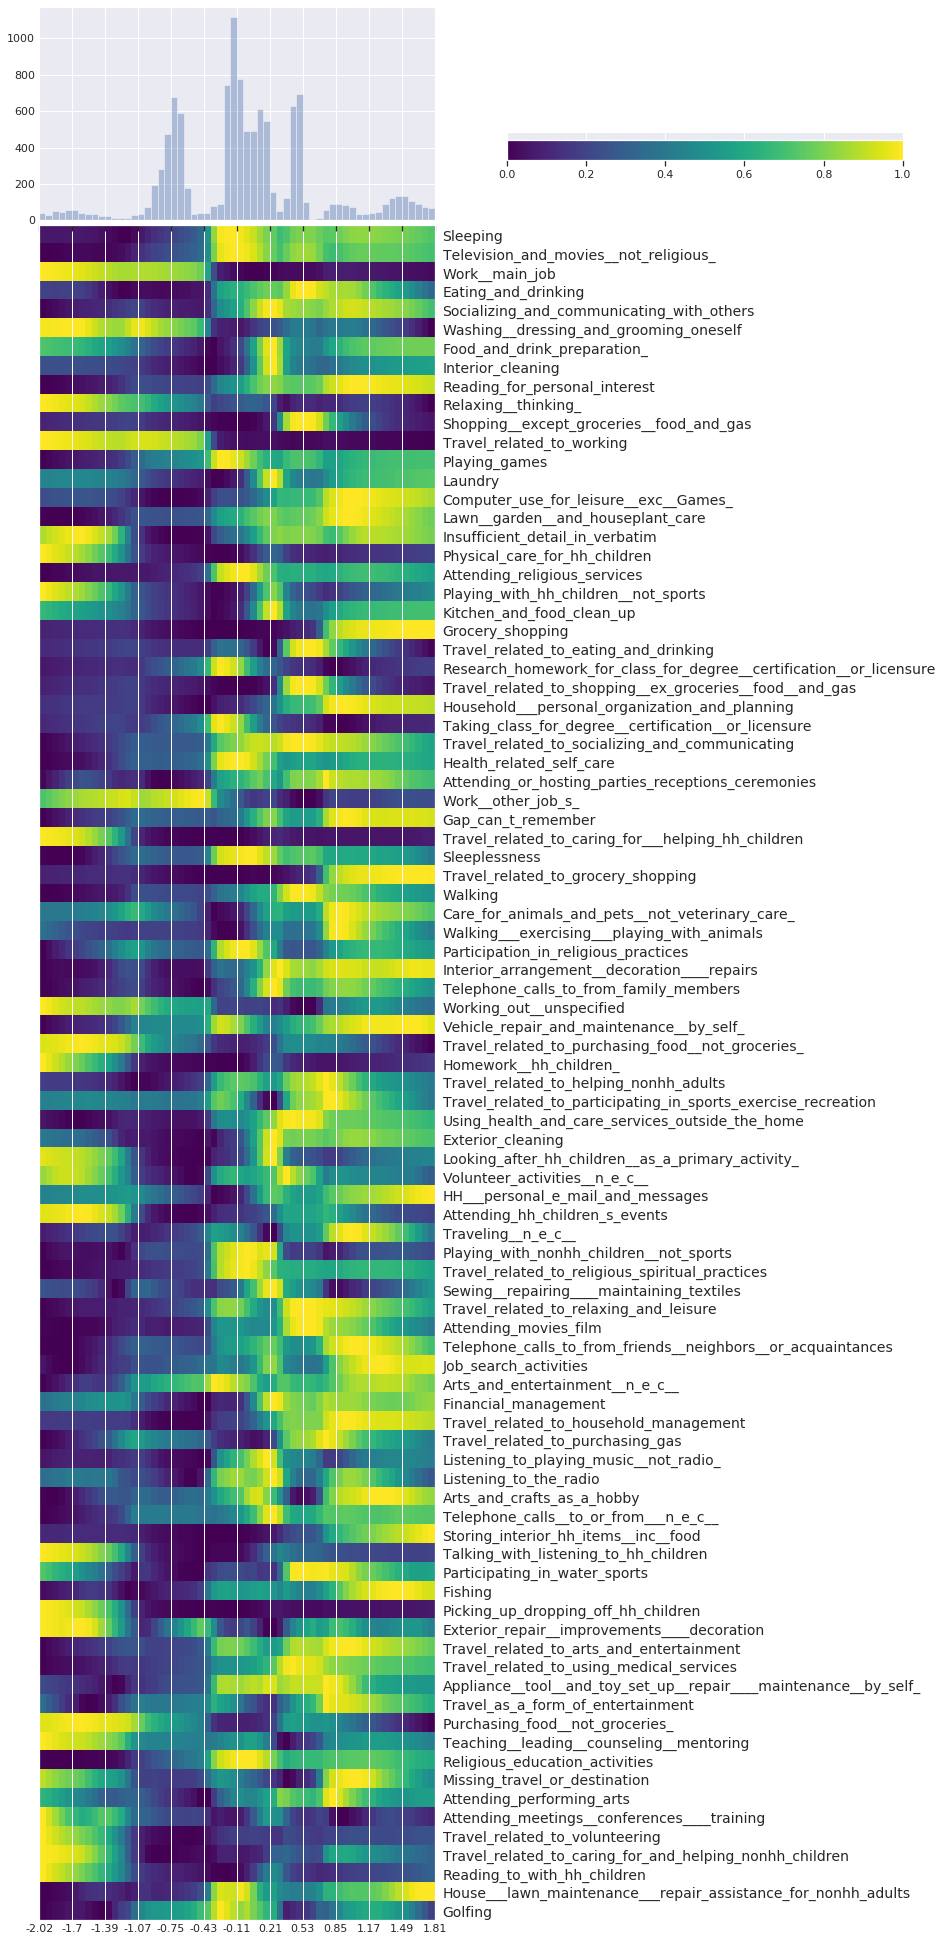

7627/7627 [==============================] - 5s 594us/sample - loss: 0.0147 - val_loss: 0.0136
Epoch 2/8
7627/7627 [==============================] - 1s 77us/sample - loss: 0.0147 - val_loss: 0.0136
Epoch 3/8
7627/7627 [==============================] - 1s 76us/sample - loss: 0.0147 - val_loss: 0.0136
Epoch 4/8
7627/7627 [==============================] - 1s 74us/sample - loss: 0.0146 - val_loss: 0.0135
Epoch 5/8
7627/7627 [==============================] - 1s 74us/sample - loss: 0.0147 - val_loss: 0.0137
Epoch 6/8
7627/7627 [==============================] - 1s 75us/sample - loss: 0.0146 - val_loss: 0.0135
Epoch 7/8
7627/7627 [==============================] - 1s 75us/sample - loss: 0.0146 - val_loss: 0.0135
Epoch 8/8
7627/7627 [==============================] - 1s 75us/sample - loss: 0.0146 - val_loss: 0.0136
Round number:  5
Train on 7627 samples, validate on 3758 samples
Epoch 1/8
7168/7627 [===========================>..] - ETA: 0s - loss: 0.0146

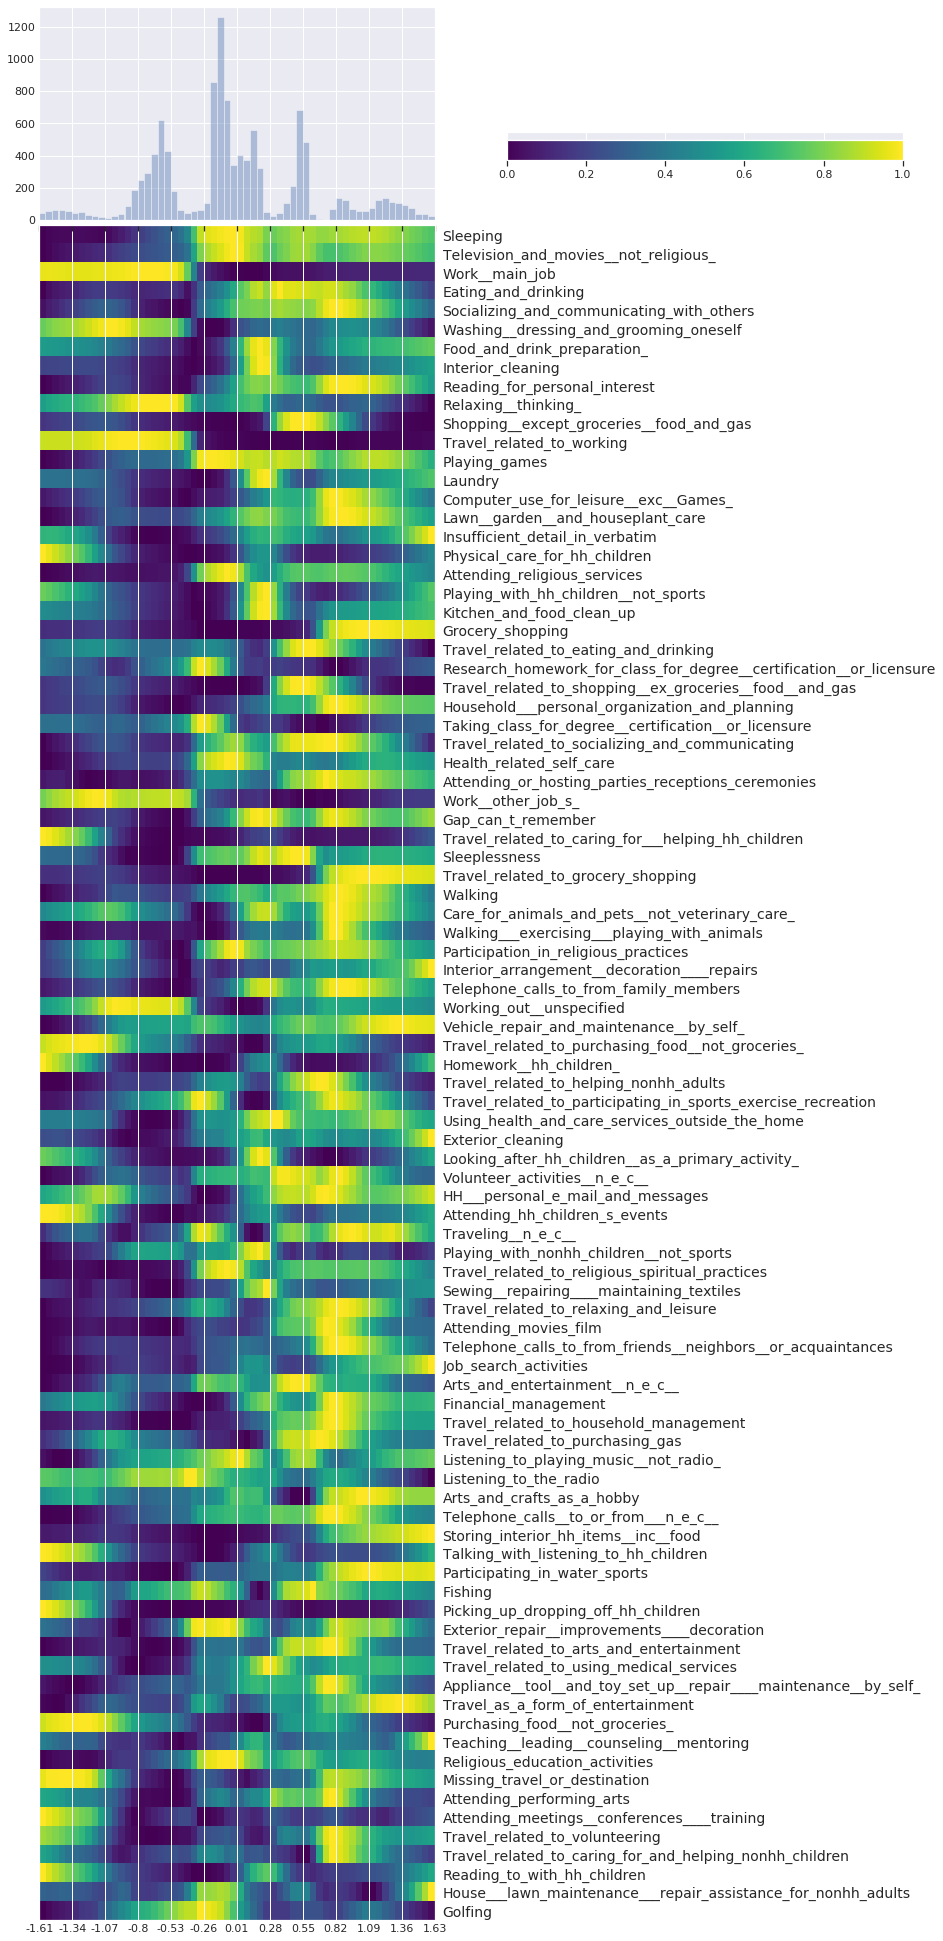

7627/7627 [==============================] - 5s 628us/sample - loss: 0.0146 - val_loss: 0.0135
Epoch 2/8
7627/7627 [==============================] - 1s 76us/sample - loss: 0.0146 - val_loss: 0.0135
Epoch 3/8
7627/7627 [==============================] - 1s 75us/sample - loss: 0.0146 - val_loss: 0.0135
Epoch 4/8
7627/7627 [==============================] - 1s 77us/sample - loss: 0.0146 - val_loss: 0.0137
Epoch 5/8
7627/7627 [==============================] - 1s 76us/sample - loss: 0.0146 - val_loss: 0.0134
Epoch 6/8
7627/7627 [==============================] - 1s 75us/sample - loss: 0.0146 - val_loss: 0.0134
Epoch 7/8
7627/7627 [==============================] - 1s 77us/sample - loss: 0.0145 - val_loss: 0.0136
Epoch 8/8
7627/7627 [==============================] - 1s 75us/sample - loss: 0.0146 - val_loss: 0.0135
Round number:  6
Train on 7627 samples, validate on 3758 samples
Epoch 1/8
7424/7627 [============================>.] - ETA: 0s - loss: 0.0146

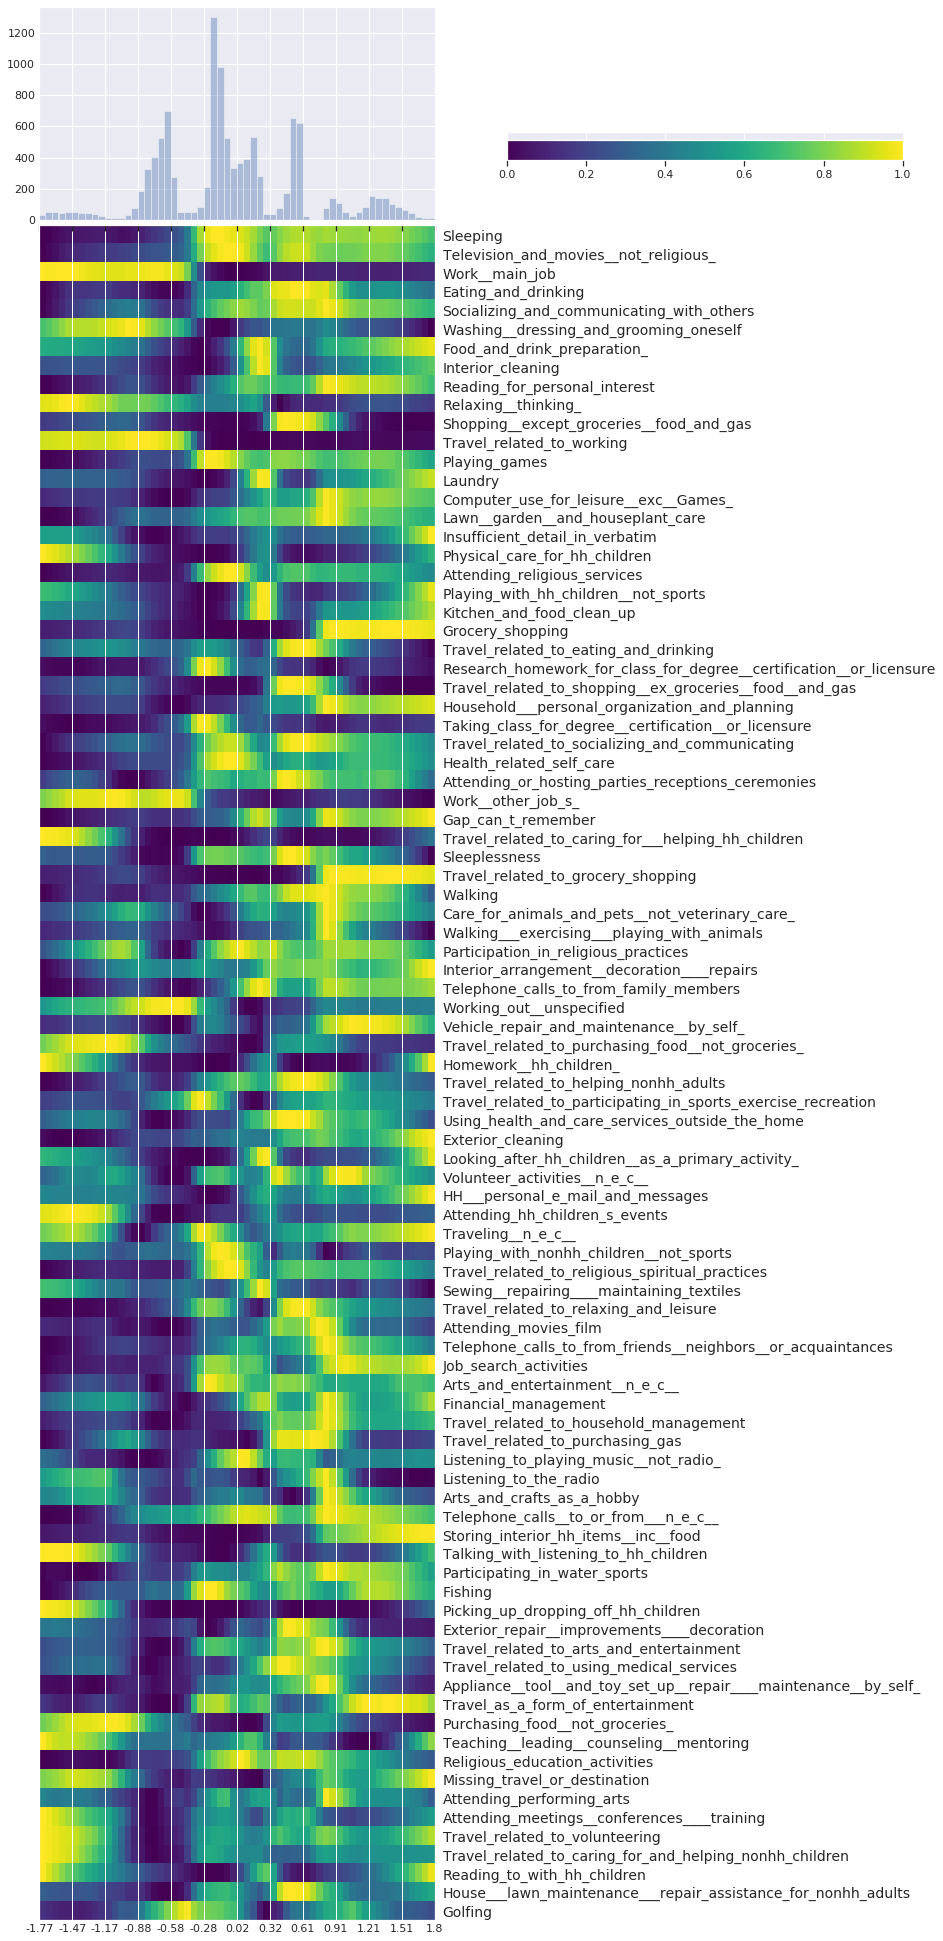

7627/7627 [==============================] - 5s 598us/sample - loss: 0.0145 - val_loss: 0.0135
Epoch 2/8
7627/7627 [==============================] - 1s 81us/sample - loss: 0.0146 - val_loss: 0.0135
Epoch 3/8
7627/7627 [==============================] - 1s 76us/sample - loss: 0.0146 - val_loss: 0.0135
Epoch 4/8
7627/7627 [==============================] - 1s 76us/sample - loss: 0.0146 - val_loss: 0.0134
Epoch 5/8
7627/7627 [==============================] - 1s 75us/sample - loss: 0.0146 - val_loss: 0.0135
Epoch 6/8
7627/7627 [==============================] - 1s 75us/sample - loss: 0.0146 - val_loss: 0.0135
Epoch 7/8
7627/7627 [==============================] - 1s 75us/sample - loss: 0.0145 - val_loss: 0.0134
Epoch 8/8
7627/7627 [==============================] - 1s 75us/sample - loss: 0.0145 - val_loss: 0.0134
Round number:  7
Train on 7627 samples, validate on 3758 samples
Epoch 1/8
7424/7627 [============================>.] - ETA: 0s - loss: 0.0145

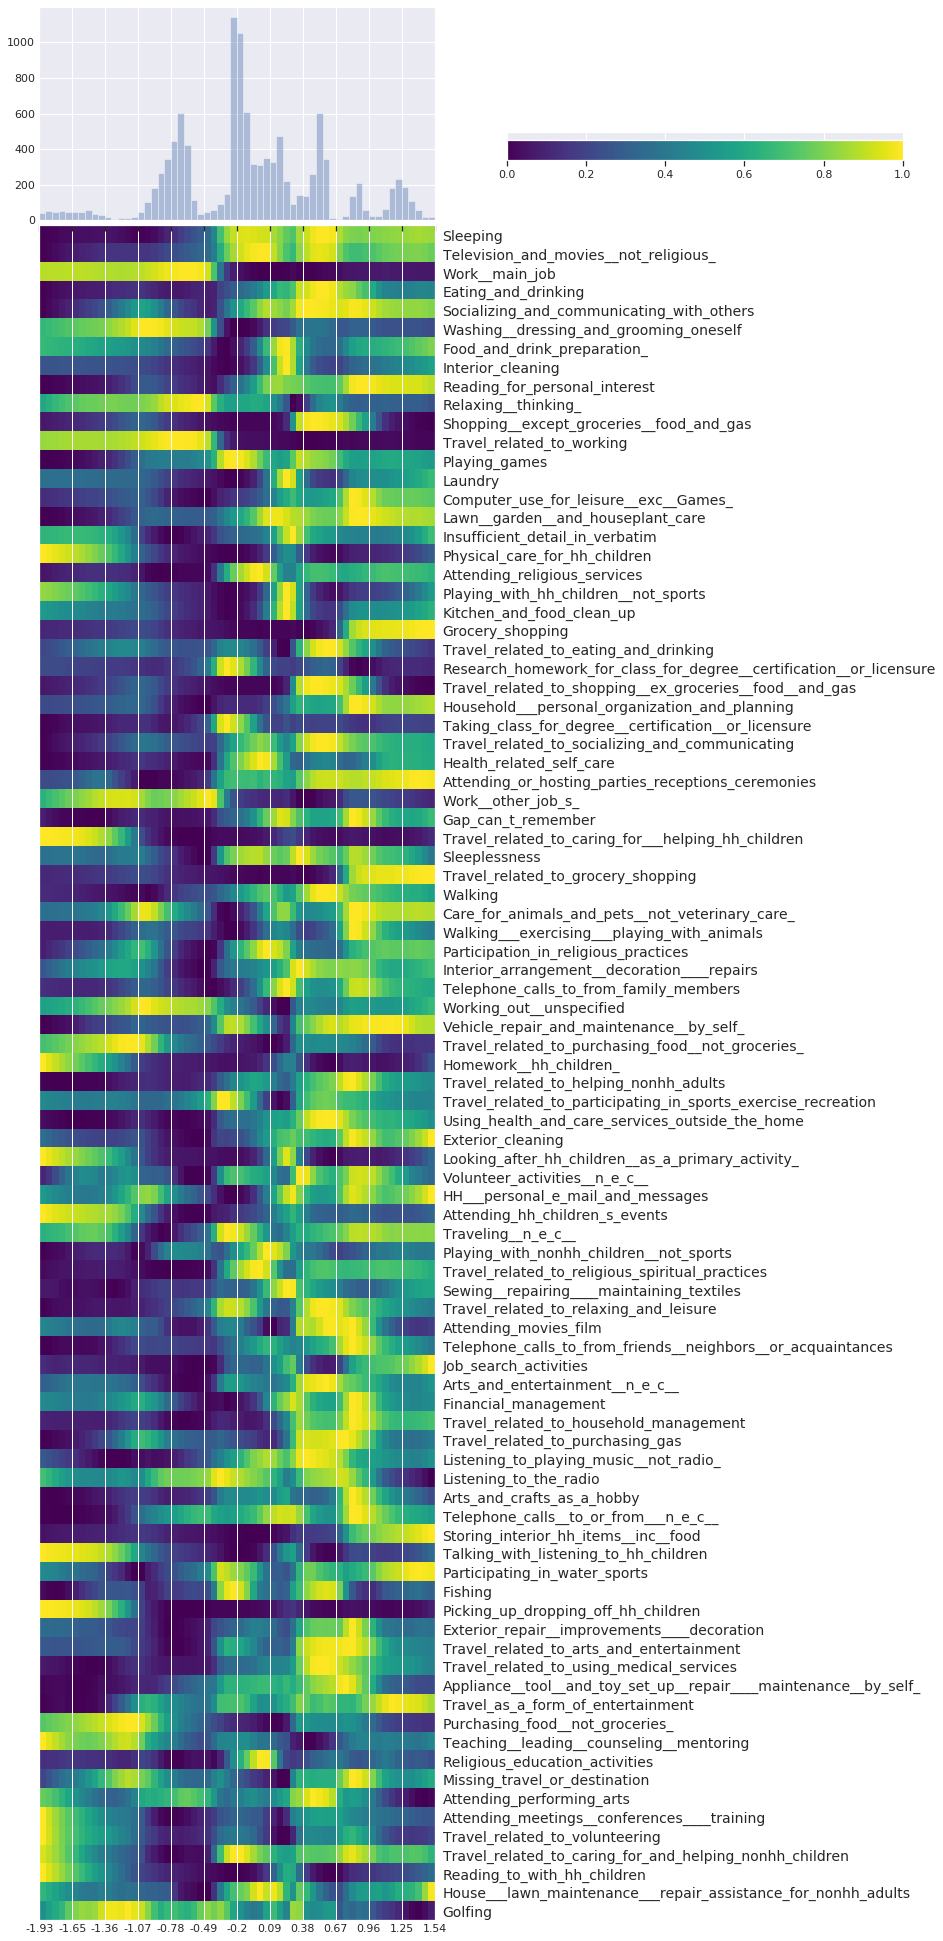

7627/7627 [==============================] - 5s 597us/sample - loss: 0.0145 - val_loss: 0.0134
Epoch 2/8
7627/7627 [==============================] - 1s 78us/sample - loss: 0.0145 - val_loss: 0.0134
Epoch 3/8
7627/7627 [==============================] - 1s 78us/sample - loss: 0.0145 - val_loss: 0.0135
Epoch 4/8
7627/7627 [==============================] - 1s 77us/sample - loss: 0.0145 - val_loss: 0.0134
Epoch 5/8
7627/7627 [==============================] - 1s 75us/sample - loss: 0.0145 - val_loss: 0.0134
Epoch 6/8
7627/7627 [==============================] - 1s 76us/sample - loss: 0.0145 - val_loss: 0.0134
Epoch 7/8
7627/7627 [==============================] - 1s 76us/sample - loss: 0.0146 - val_loss: 0.0134
Epoch 8/8
7627/7627 [==============================] - 1s 77us/sample - loss: 0.0145 - val_loss: 0.0134
Round number:  8
Train on 7627 samples, validate on 3758 samples
Epoch 1/8
7168/7627 [===========================>..] - ETA: 0s - loss: 0.0145

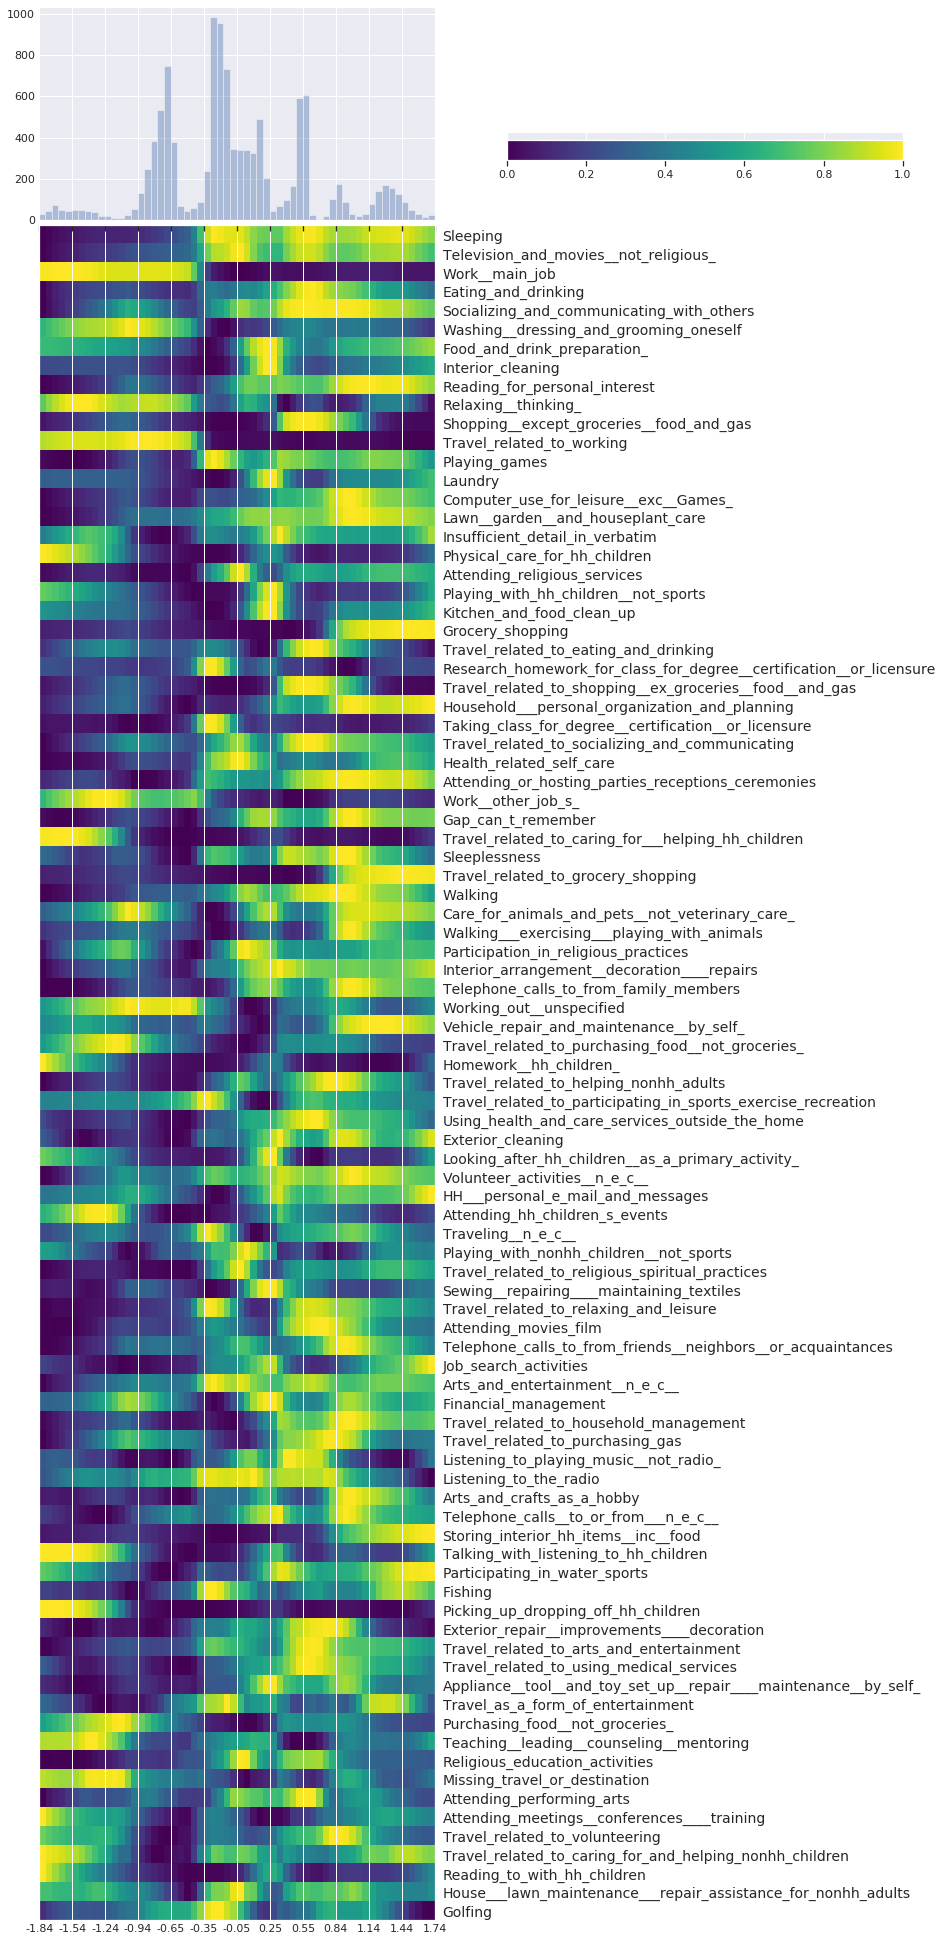

7627/7627 [==============================] - 5s 601us/sample - loss: 0.0145 - val_loss: 0.0134
Epoch 2/8
7627/7627 [==============================] - 1s 78us/sample - loss: 0.0145 - val_loss: 0.0135
Epoch 3/8
7627/7627 [==============================] - 1s 76us/sample - loss: 0.0145 - val_loss: 0.0134
Epoch 4/8
7627/7627 [==============================] - 1s 77us/sample - loss: 0.0145 - val_loss: 0.0134
Epoch 5/8
7627/7627 [==============================] - 1s 77us/sample - loss: 0.0145 - val_loss: 0.0135
Epoch 6/8
7627/7627 [==============================] - 1s 76us/sample - loss: 0.0145 - val_loss: 0.0135
Epoch 7/8
7627/7627 [==============================] - 1s 78us/sample - loss: 0.0145 - val_loss: 0.0134
Epoch 8/8
7627/7627 [==============================] - 1s 75us/sample - loss: 0.0145 - val_loss: 0.0134
Round number:  9
Train on 7627 samples, validate on 3758 samples
Epoch 1/8
7168/7627 [===========================>..] - ETA: 0s - loss: 0.0145

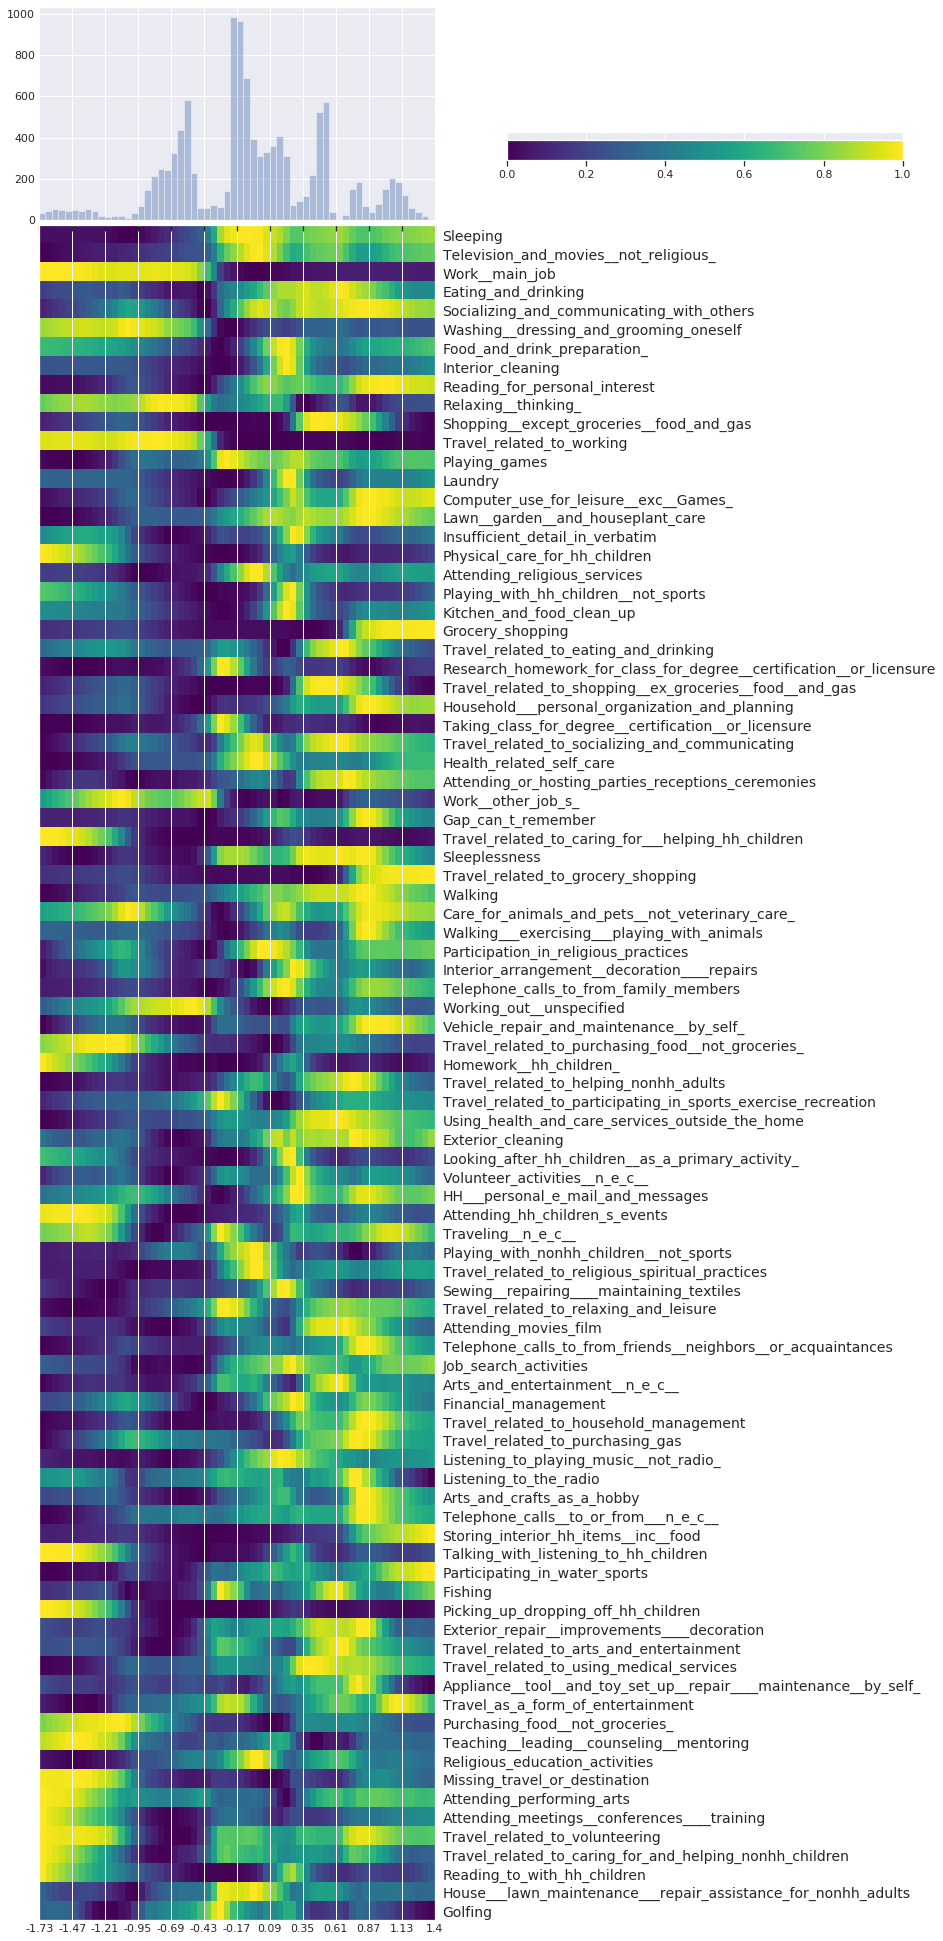

7627/7627 [==============================] - 5s 594us/sample - loss: 0.0145 - val_loss: 0.0134
Epoch 2/8
7627/7627 [==============================] - 1s 76us/sample - loss: 0.0145 - val_loss: 0.0136
Epoch 3/8
7627/7627 [==============================] - 1s 75us/sample - loss: 0.0146 - val_loss: 0.0135
Epoch 4/8
7627/7627 [==============================] - 1s 75us/sample - loss: 0.0145 - val_loss: 0.0134
Epoch 5/8
7627/7627 [==============================] - 1s 76us/sample - loss: 0.0145 - val_loss: 0.0134
Epoch 6/8
7627/7627 [==============================] - 1s 75us/sample - loss: 0.0145 - val_loss: 0.0134
Epoch 7/8
7627/7627 [==============================] - 1s 75us/sample - loss: 0.0145 - val_loss: 0.0134
Epoch 8/8
7627/7627 [==============================] - 1s 75us/sample - loss: 0.0145 - val_loss: 0.0134
Round number:  10
Train on 7627 samples, validate on 3758 samples
Epoch 1/8
6912/7627 [==========================>...] - ETA: 0s - loss: 0.0145

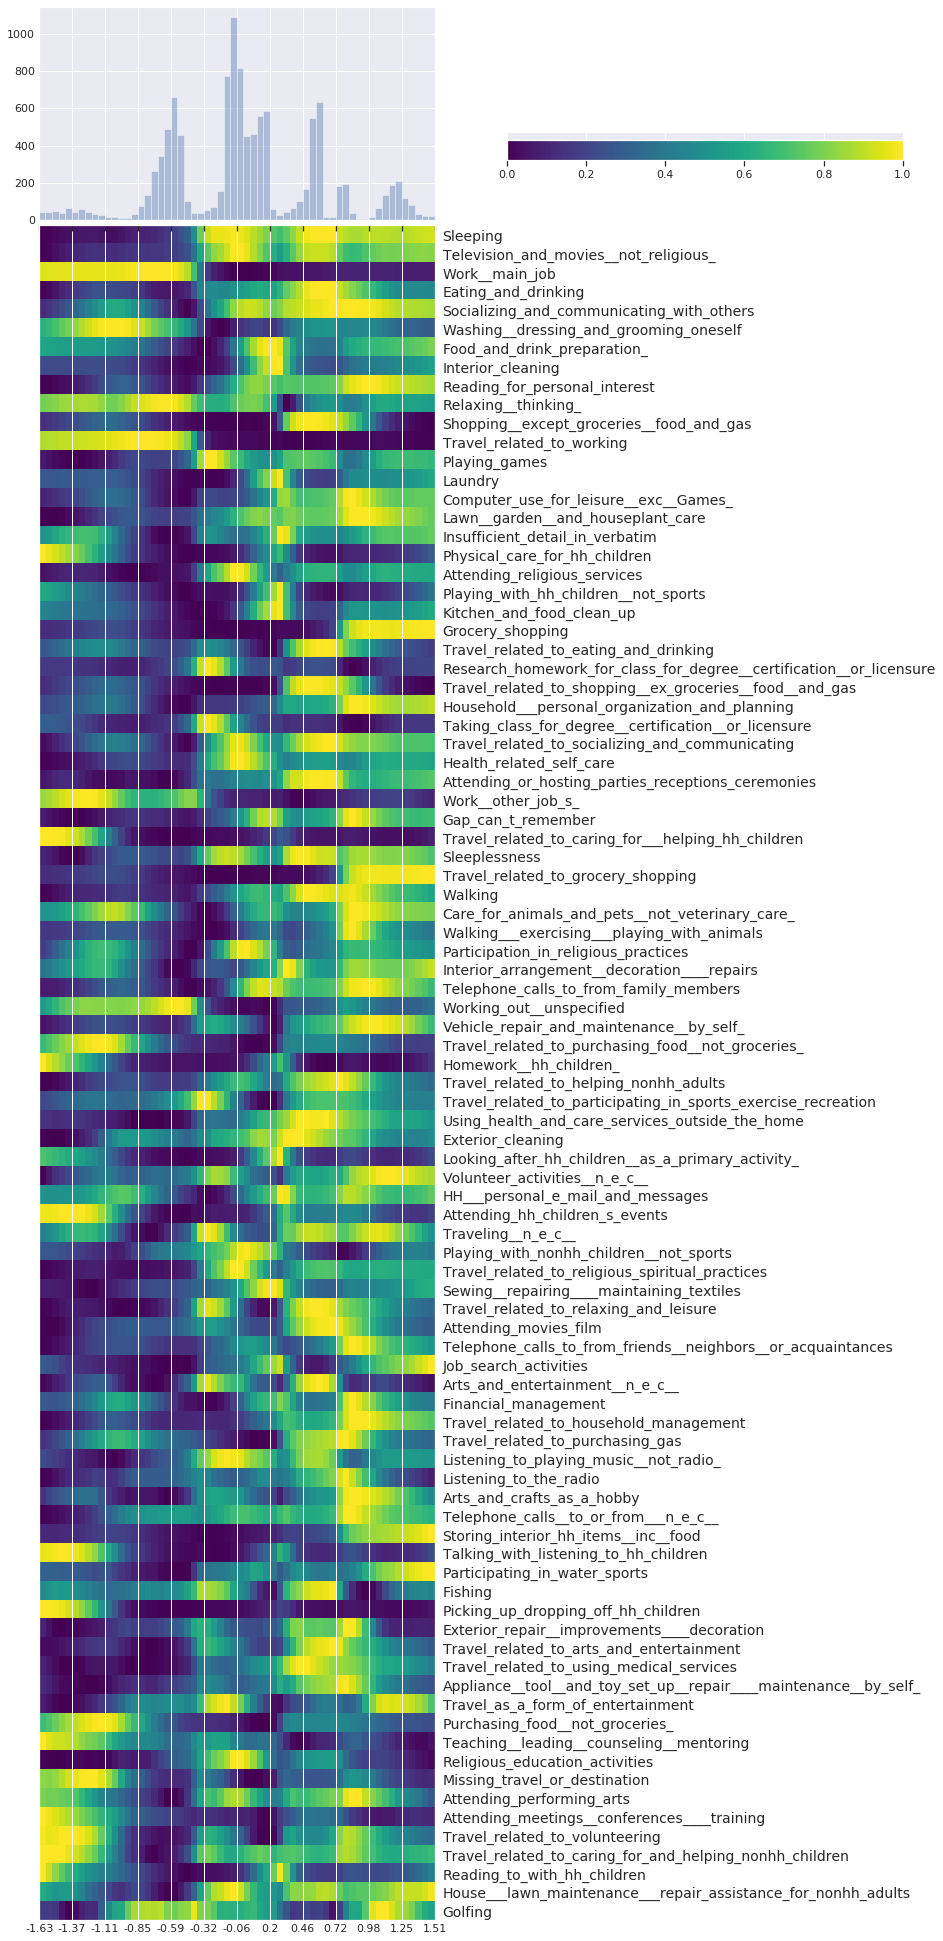

7627/7627 [==============================] - 5s 602us/sample - loss: 0.0145 - val_loss: 0.0135
Epoch 2/8
7627/7627 [==============================] - 1s 78us/sample - loss: 0.0145 - val_loss: 0.0135
Epoch 3/8
7627/7627 [==============================] - 1s 76us/sample - loss: 0.0145 - val_loss: 0.0134
Epoch 4/8
7627/7627 [==============================] - 1s 79us/sample - loss: 0.0145 - val_loss: 0.0134
Epoch 5/8
7627/7627 [==============================] - 1s 78us/sample - loss: 0.0145 - val_loss: 0.0135
Epoch 6/8
7627/7627 [==============================] - 1s 77us/sample - loss: 0.0145 - val_loss: 0.0135
Epoch 7/8
7627/7627 [==============================] - 1s 76us/sample - loss: 0.0145 - val_loss: 0.0135
Epoch 8/8
7627/7627 [==============================] - 1s 75us/sample - loss: 0.0145 - val_loss: 0.0135
Round number:  11
Train on 7627 samples, validate on 3758 samples
Epoch 1/8
6912/7627 [==========================>...] - ETA: 0s - loss: 0.0145

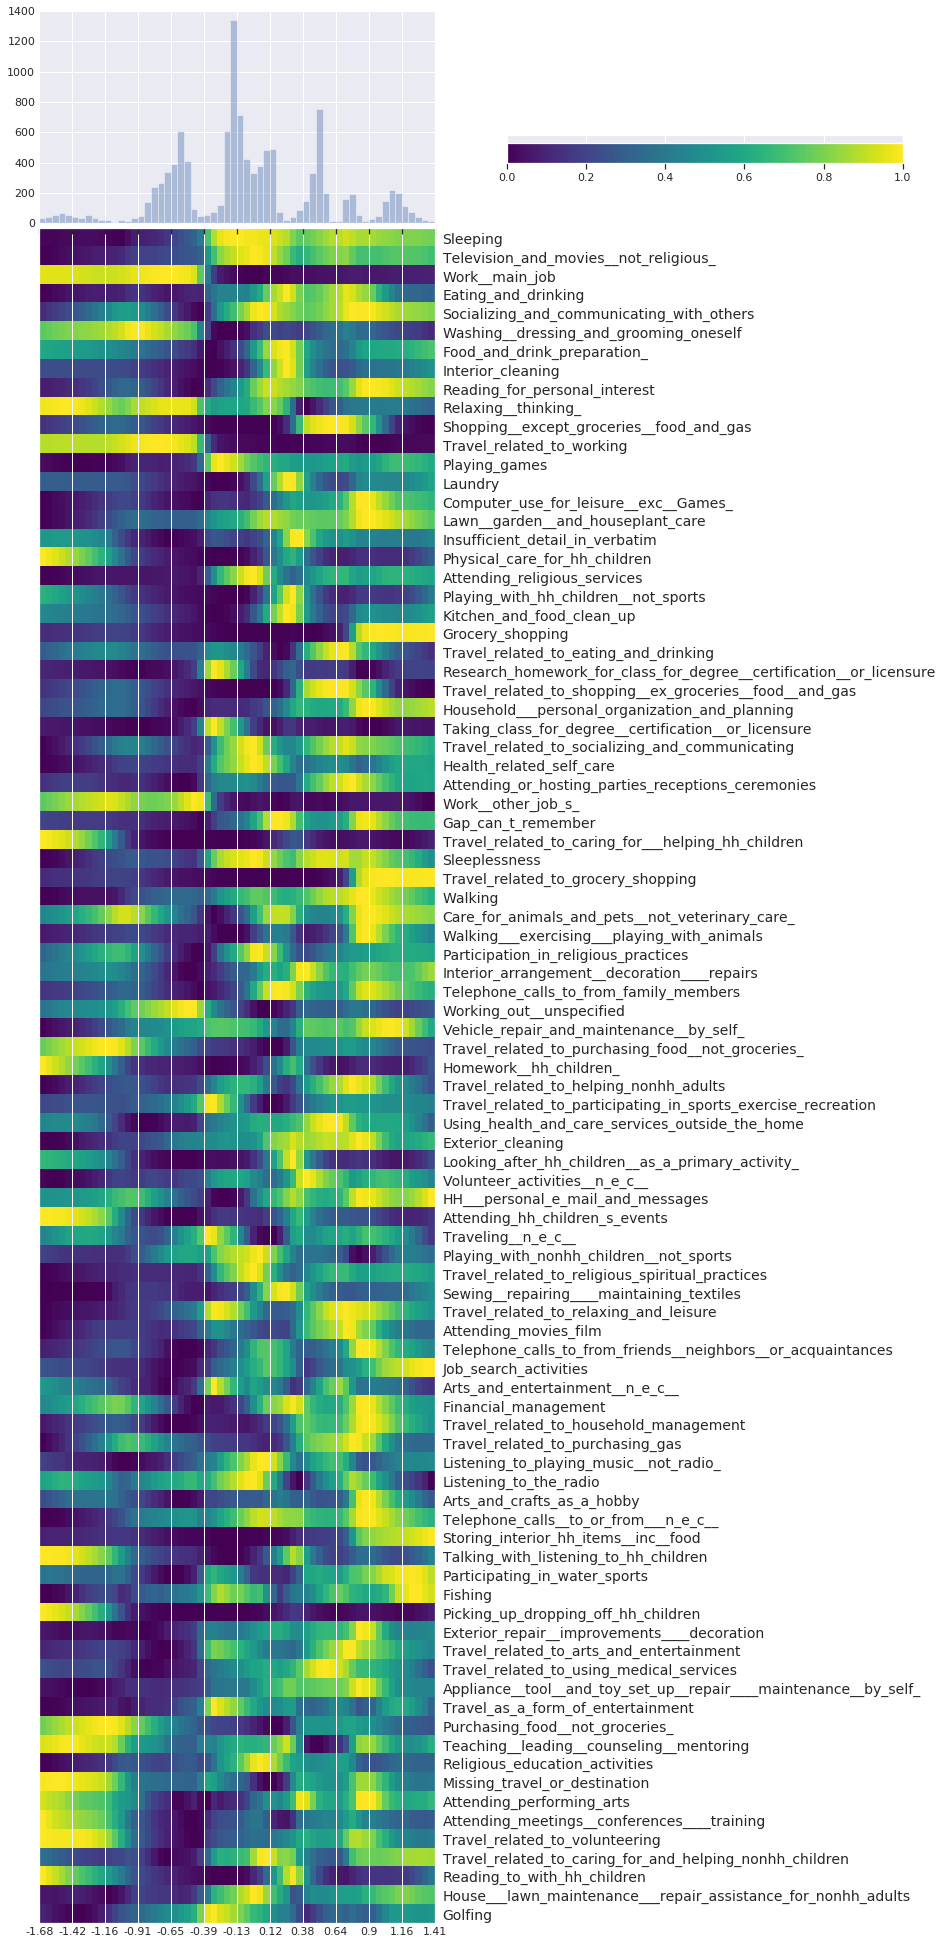

7627/7627 [==============================] - 5s 602us/sample - loss: 0.0145 - val_loss: 0.0135
Epoch 2/8
7627/7627 [==============================] - 1s 76us/sample - loss: 0.0145 - val_loss: 0.0134
Epoch 3/8
7627/7627 [==============================] - 1s 76us/sample - loss: 0.0145 - val_loss: 0.0134
Epoch 4/8
7627/7627 [==============================] - 1s 75us/sample - loss: 0.0145 - val_loss: 0.0134
Epoch 5/8
7627/7627 [==============================] - 1s 76us/sample - loss: 0.0145 - val_loss: 0.0134
Epoch 6/8
7627/7627 [==============================] - 1s 78us/sample - loss: 0.0145 - val_loss: 0.0134
Epoch 7/8
7627/7627 [==============================] - 1s 77us/sample - loss: 0.0145 - val_loss: 0.0134
Epoch 8/8
7627/7627 [==============================] - 1s 75us/sample - loss: 0.0145 - val_loss: 0.0135
Round number:  12
Train on 7627 samples, validate on 3758 samples
Epoch 1/8
6656/7627 [=========================>....] - ETA: 0s - loss: 0.0145

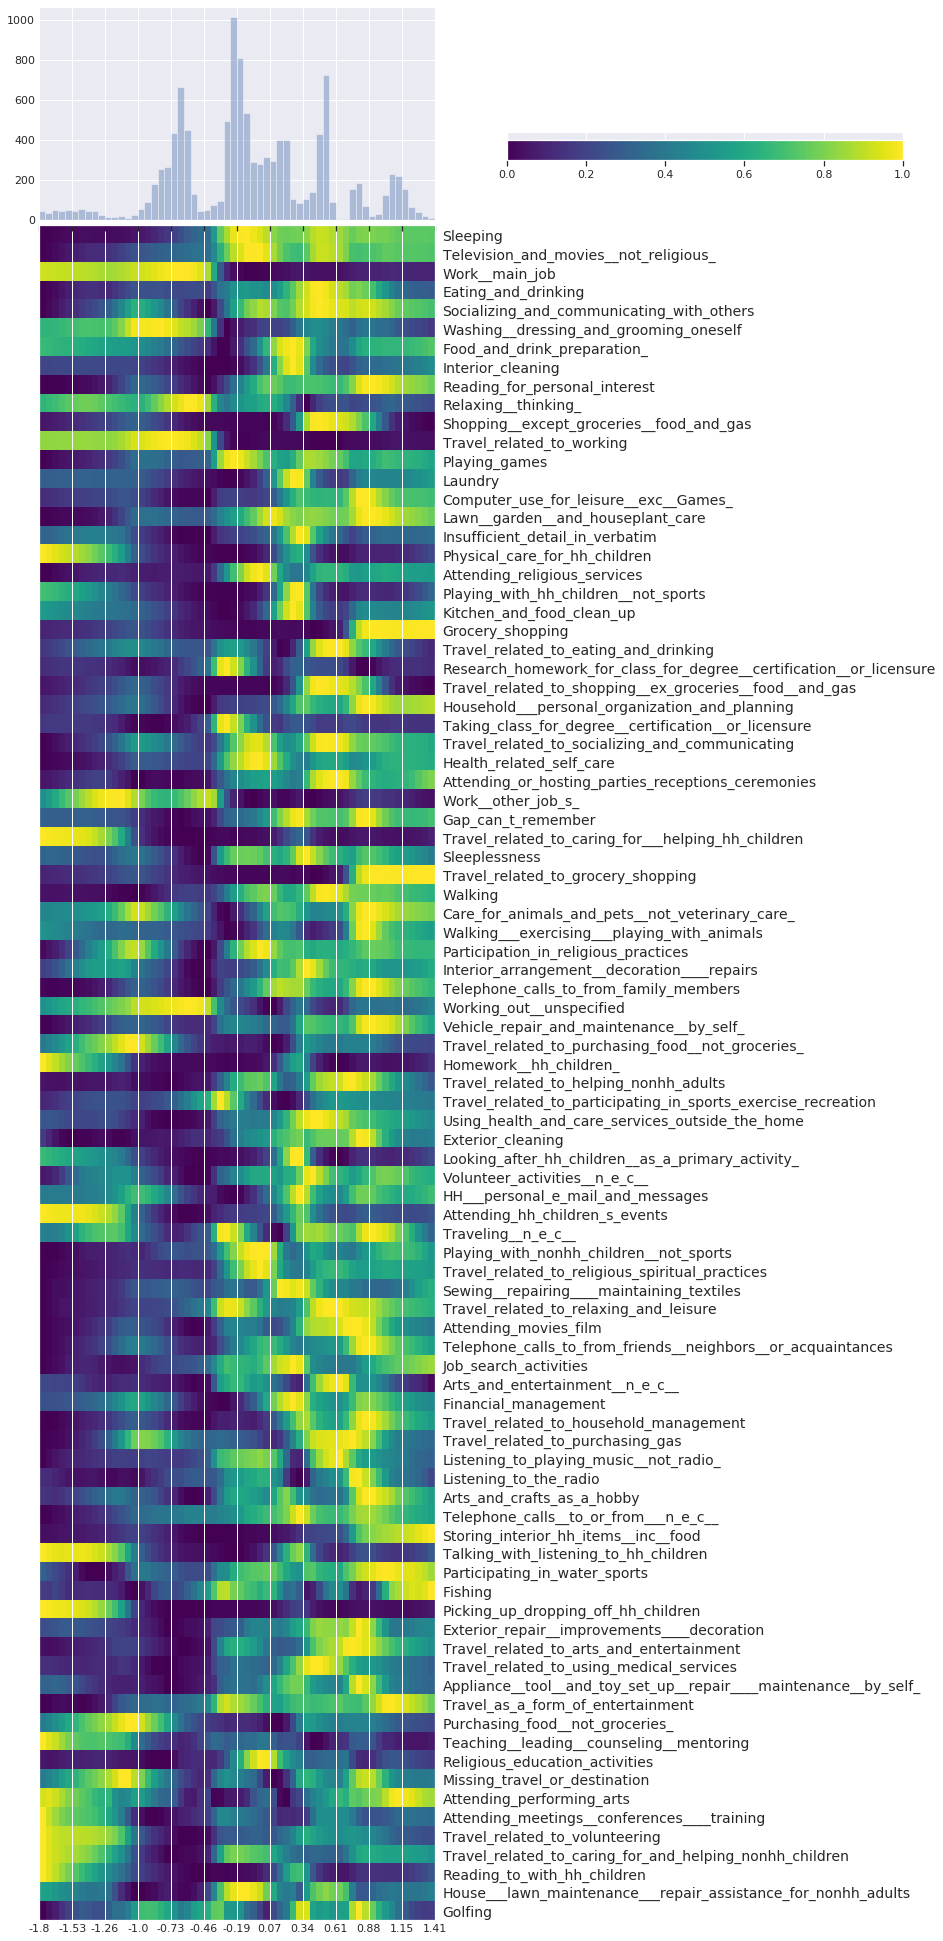

7627/7627 [==============================] - 5s 636us/sample - loss: 0.0145 - val_loss: 0.0134
Epoch 2/8
7627/7627 [==============================] - 1s 82us/sample - loss: 0.0145 - val_loss: 0.0134
Epoch 3/8
7627/7627 [==============================] - 1s 76us/sample - loss: 0.0145 - val_loss: 0.0134
Epoch 4/8
7627/7627 [==============================] - 1s 78us/sample - loss: 0.0145 - val_loss: 0.0134
Epoch 5/8
7627/7627 [==============================] - 1s 77us/sample - loss: 0.0145 - val_loss: 0.0135
Epoch 6/8
7627/7627 [==============================] - 1s 80us/sample - loss: 0.0145 - val_loss: 0.0134
Epoch 7/8
7627/7627 [==============================] - 1s 75us/sample - loss: 0.0145 - val_loss: 0.0134
Epoch 8/8
7627/7627 [==============================] - 1s 78us/sample - loss: 0.0145 - val_loss: 0.0134


In [17]:
# from vaes_net import make_vae, plot_types
importlib.reload(vnn)
seed(42)
set_random_seed(42)
vae = vnn.make_vae(full_data=qt,  
    img_shape = (389+1, ),
    latent_dim = 1, 
    dense_width = 2048,
    l2_penalty=0.000000000001,
    l1_penalty=0.0,
    encoder_dropout_rate=0.5,
    decoder_dropout_rate=0.001,
    entanglement_penalty = 2,
    hidden_n = 3)  

vae.summary()

n_starts = 12

for i in range(0,n_starts):

  print("Round number: ", i+1)

  fitted = vae.fit(
      x=x_train, 
      y=None,
      shuffle=True,
      epochs=round(epochs/n_starts),
      batch_size=batch_size,
      validation_data=(x_test, None),
      callbacks = vae.callback_list
      )

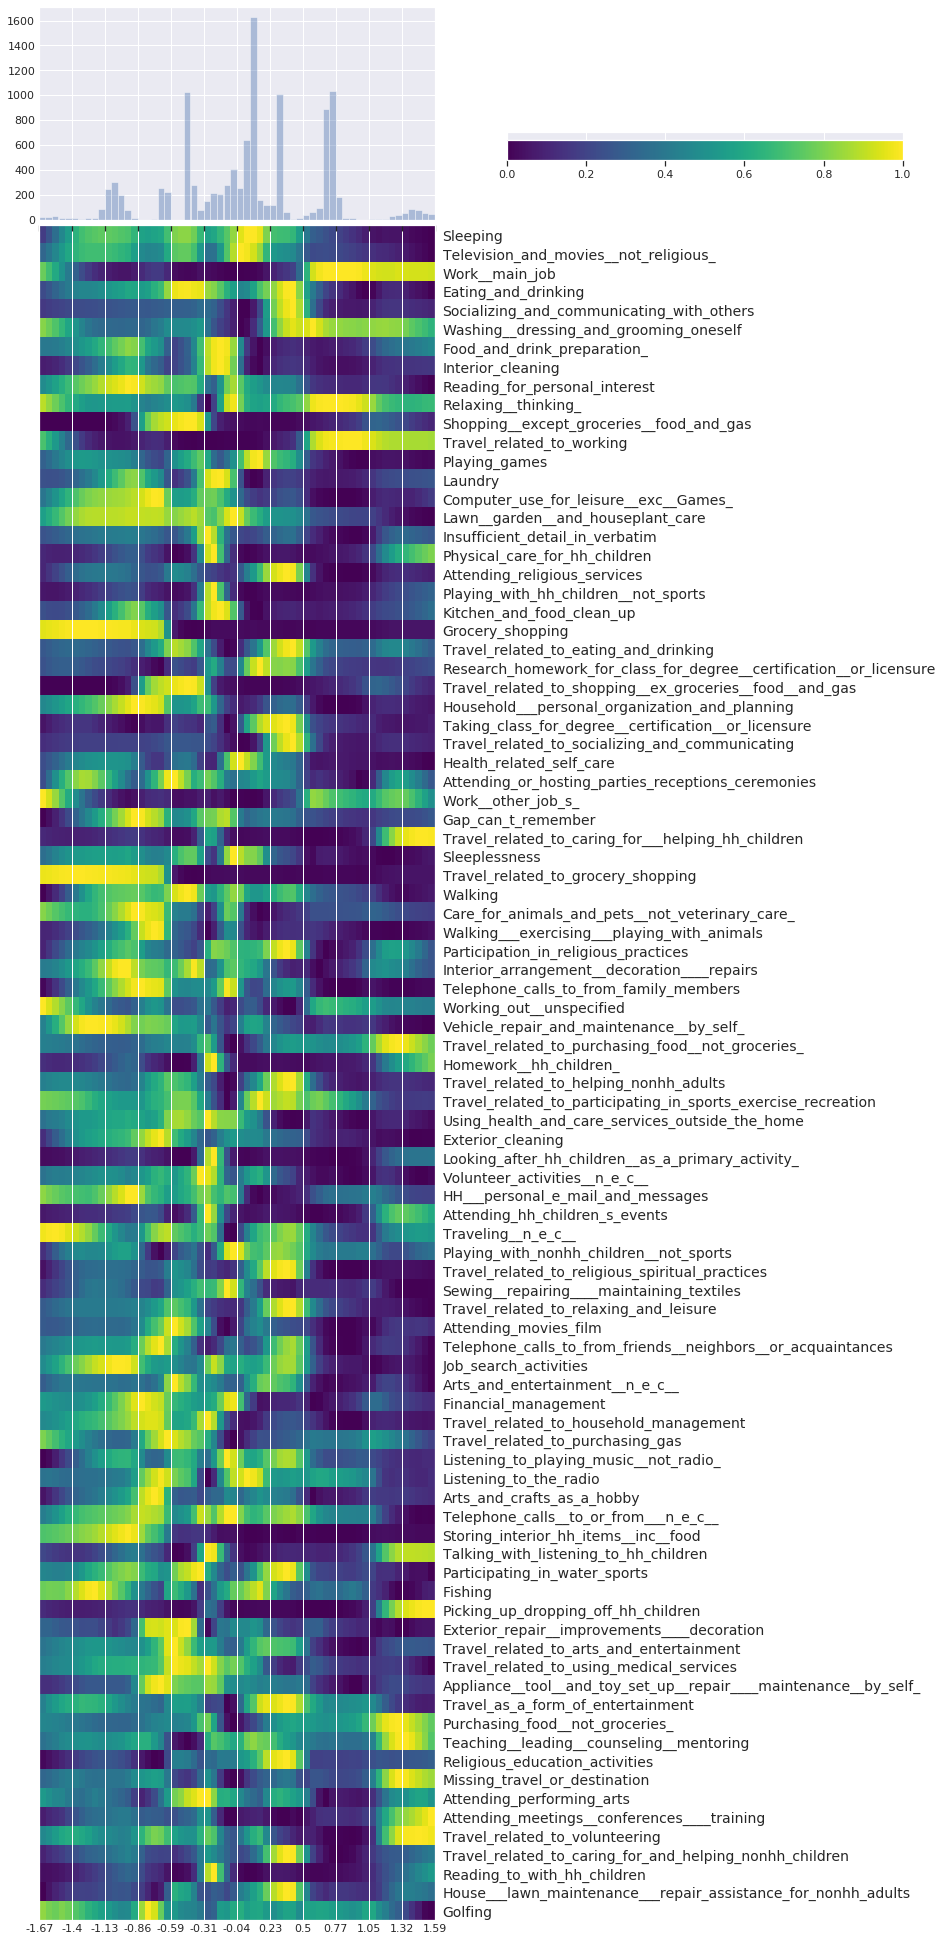

In [10]:
plot_types(encoder=vae.encoder,decoder=vae.decoder,data=qt);

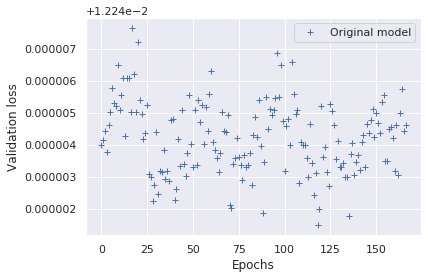

In [0]:

val_loss1 = fitted.history['val_loss']
#val_loss2 = fitted2.history['val_loss']
epochs_grid = range(0, np.shape(val_loss1)[0])

import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs_grid, val_loss1, 'b+', label='Original model')
# "bo" is for "blue dot"
#plt.plot(epochs_grid, val_loss2, 'bo', label='Alternative model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

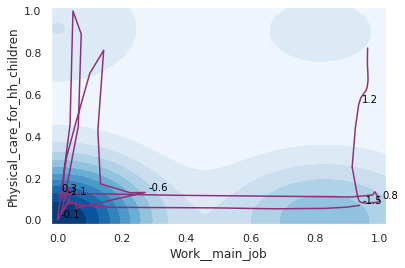

In [0]:
from vaes_net import encode_plot2d
  
encode_plot2d(encoder=vae.encoder,decoder=vae.decoder, 
              data=vae.full_data)

In [0]:

flag_1 = np.ones((qt.shape[0],1),dtype=qt.values.dtype)
data = np.concatenate((qt.values,flag_1),axis=-1)
encoded_data=vae.encoder.predict(data)
pd.DataFrame(encoded_data)

0
0     -0.009498
1     -0.904279
2     -0.984523
3      0.681967
4     -0.069395
...         ...
11380 -0.066938
11381  0.555824
11382  0.592551
11383  0.007263
11384 -0.203313

[11385 rows x 1 columns]

In [0]:
from sklearn.preprocessing import MinMaxScaler

filtered=pd.DataFrame((vae.decoder.predict(encoded_data)))
scaler = MinMaxScaler()
filtered=pd.DataFrame(scaler.fit_transform(filtered))  
filtered.columns = df.columns
filtered

Sleeping  ...  Public_health_activities
0      0.993480  ...                  0.929695
1      0.817968  ...                  0.791564
2      0.850039  ...                  0.712347
3      0.492996  ...                  0.698672
4      0.966412  ...                  0.775298
...         ...  ...                       ...
11380  0.969547  ...                  0.776811
11381  0.416353  ...                  0.718430
11382  0.446471  ...                  0.707096
11383  0.980669  ...                  0.946521
11384  0.851012  ...                  0.550063

[11385 rows x 389 columns]

In [0]:
# for field in filtered.columns[0:29]:
    
#      encode_plot2d(vae.encoder,vae.decoder, qt, y_col=field)

In [0]:
filtered-qt

Sleeping  ...  Public_health_activities
0      0.421909  ...                  0.929695
1      0.124775  ...                  0.791564
2      0.587777  ...                  0.712347
3      0.230734  ...                  0.698672
4      0.303249  ...                  0.775298
...         ...  ...                       ...
11380  0.707284  ...                  0.776811
11381  0.129066  ...                  0.718430
11382 -0.390366  ...                  0.707096
11383  0.513703  ...                  0.946521
11384  0.741903  ...                  0.550063

[11385 rows x 389 columns]

In [0]:
pd.DataFrame(encoded_data).to_csv("encoded_data.csv", header=False, index=False)


In [0]:
vae.encoder.save_weights('encoder')

In [0]:
vae.decoder.save_weights('decoder')

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive/VAEs-in-Economics/Resources"

decoder.data-00000-of-00002
decoder.data-00001-of-00002
decoder.index
encoded_data.csv
encoder.data-00000-of-00002
encoder.data-00001-of-00002
encoder.index
EqualSizedBins.png
PaintedStones.png
type_plot.png
VAE.png
VAE.pptx
Work__main_job_Attending_religious_services.png
Work__main_job_Computer_use_for_leisure__exc__Games_.png
Work__main_job_Eating_and_drinking.png
Work__main_job_Food_and_drink_preparation_.png
Work__main_job_Grocery_shopping.png
Work__main_job_Health_related_self_care.png
Work__main_job_Household___personal_organization_and_planning.png
Work__main_job_Insufficient_detail_in_verbatim.png
Work__main_job_Interior_cleaning.png
Work__main_job_Kitchen_and_food_clean_up.png
Work__main_job_Laundry.png
Work__main_job_Lawn__garden__and_houseplant_care.png
Work__main_job_Physical_care_for_hh_children.png
Work__main_job_Playing_games.png
Work__main_job_Playing_with_hh_children__not_sports.png
Work__main_job_Reading_for_personal_interest.png
Work__main_job_Relaxing__thinking_.png

In [0]:
!cp *.png "/content/drive/My Drive/VAEs-in-Economics/Resources"

In [0]:
!cp *.csv "/content/drive/My Drive/VAEs-in-Economics/Resources"

In [0]:
!cp encoder.* "/content/drive/My Drive/VAEs-in-Economics/Resources"

In [0]:
!cp decoder.* "/content/drive/My Drive/VAEs-in-Economics/Resources"